In [71]:
import pandas as pd

In [72]:
import numpy as np

In [73]:
import math

In [74]:
train=pd.read_csv('f:/ml4trainsparse.csv',usecols=[1,2,3])
test=pd.read_csv('f:/ml4testsparse.csv',usecols=[1,2,3])

In [75]:
no_movies = 3953
no_users = 6041

In [76]:
train.head()

,userId,movieId,rating
0,5074,1574,3
1,1180,1270,5
2,1621,2150,3
3,6036,514,3
4,3139,678,5


In [77]:
movies_mean=np.zeros(shape=[no_movies,3])

In [78]:
user_total=np.zeros(no_users)
cnt=np.zeros(no_users,dtype='int64')
for i, row in enumerate(train.itertuples(), 1):
    p=int(row.movieId)
    movies_mean[p][0]+=1
    movies_mean[p][1]+=row.rating
    k=int(row.userId)
    cnt[k]+=1
    user_total[k]+=row.rating
 

In [79]:
user_mean=np.array([ i/j for i,j in zip(user_total,cnt) ])
for x in movies_mean:
    x[2]=round(x[1]/x[0],2)
    
for x in movies_mean:
    if math.isnan(x[2]):
        x[2]=0
        


In [80]:
for i in range(len(user_mean)):
    if math.isnan(user_mean[i]):
        user_mean[i]=0

In [81]:
foruser=np.zeros(no_users)
formovies=np.zeros(no_movies)
for i, row in enumerate(train.itertuples(), 1):
    mov=int(row.movieId)
    usr=int(row.userId)
    foruser[usr]+=movies_mean[mov][2]
    formovies[mov]+=user_mean[usr]

In [82]:
import time

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

In [84]:
rmse=[]
mae=[]
gim=[]
gpim=[]
precission=[]
recall=[]
Beta=[i/10 for i in range(1,11)]
for beta in Beta:
    error=0
    err1=0
    g2=0
    gp2=0
    tp=0
    fp=0
    tn=0
    fn=0
    c_gim=0
    c_gpim=0
    c=0
    for i, row in enumerate(test.itertuples(), 1):
        
        mov=int(row.movieId)
        usr=int(row.userId)
        actual=row.rating
        predicted_rating=0
    
    
        usr_mean=user_mean[usr]
    
        item_mean=movies_mean[mov][2]
        usr_rated=cnt[usr]
        usr_tendency=0
        if usr_rated!=0:
            usr_tendency=(user_total[usr]-foruser[usr])/usr_rated
   
        no_of_ratings=movies_mean[mov][0]
        item_tendency=0
        if no_of_ratings!=0:
            item_tendency=(movies_mean[mov][1]-formovies[mov])/no_of_ratings
   
        if usr_tendency>=0 and item_tendency>=0:
            predicted_rating=max(usr_mean+item_tendency,item_mean+usr_tendency)
    
        elif usr_tendency<0 and item_tendency<0:
            predicted_rating=min(usr_mean+item_tendency,item_mean+usr_tendency)
    
        elif usr_tendency<0 and item_tendency>=0 and item_mean>usr_mean:
            predicted_rating=min(max(usr_mean, (item_mean+usr_tendency)*beta + (usr_mean+item_tendency)*(1-beta)),item_mean)
        
        elif usr_tendency>=0 and item_tendency<0 and item_mean<usr_mean:
            predicted_rating=min(max(item_mean, (item_mean+usr_tendency)*beta + (usr_mean+item_tendency)*(1-beta)),usr_mean)
        else:
            predicted_rating=((item_mean*beta) +usr_mean*(1-beta))
    
        error+=((actual-predicted_rating)**2)
        err1+=math.fabs(actual-predicted_rating)
        c+=1
        if actual >=3:
            g2+=abs(actual-predicted_rating)
            c_gim+=1
        if predicted_rating >=3:
            gp2+=abs(actual-predicted_rating)
            c_gpim+=1
    
        if actual>=3 and predicted_rating>=3:
            tp+=1
        elif actual<3 and predicted_rating>=3:
            fp+=1
        elif actual>=3 and predicted_rating<3:
            fn+=1
        else:
            tn+=1
    
    gim.append(g2/c_gim)
    gpim.append(gp2/c_gpim)
    precission.append(tp/(tp+fp))
    recall.append(tp/(tp+fn))
    rmse.append(math.sqrt(error/c))
    mae.append(err1/c)

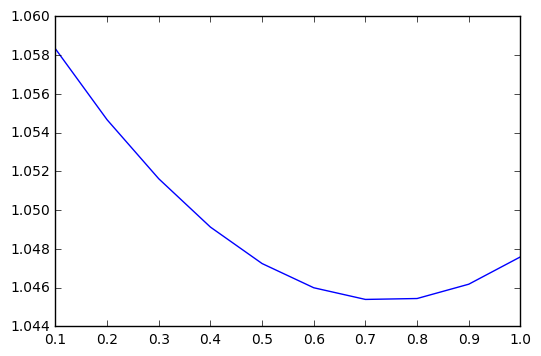

In [85]:
plt.plot(Beta,rmse)

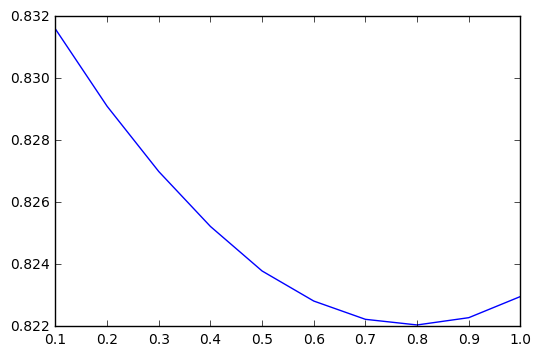

In [86]:
plt.plot(Beta,mae)

In [87]:
mae

[0.8315938943503706,
 0.8291032367136296,
 0.82699733320667,
 0.8252257568783837,
 0.82378898950401,
 0.8228193473783338,
 0.8222294912191803,
 0.8220482268808761,
 0.822282817260278,
 0.8229651173088023]

In [88]:
rmse

[1.0583281834648555,
 1.0546674133255363,
 1.0516219765967827,
 1.049127841374316,
 1.047245677515811,
 1.045996591011399,
 1.0453944260355017,
 1.0454412792972627,
 1.046180279966885,
 1.0475910962506036]

In [89]:
gim

[0.74402309001663325,
 0.74115499114268146,
 0.73872331251747325,
 0.73661540680139725,
 0.73482280631481167,
 0.73347132128234416,
 0.73256240386921356,
 0.73210557033695256,
 0.73207910788147101,
 0.73257854140816214]

In [90]:
gpim

[0.79746213564422075,
 0.7955957294378706,
 0.79350765865383077,
 0.79214382749434964,
 0.79097568343954794,
 0.78939530024258131,
 0.78937830248353713,
 0.78904939944811636,
 0.78984519705163148,
 0.7915490187838865]

In [91]:
precission

[0.887986148108684,
 0.8883282432611871,
 0.8886384727561978,
 0.8881683430386448,
 0.888477801268499,
 0.8887716057527378,
 0.8881726088672544,
 0.8891664475414147,
 0.8889034799737361,
 0.8888304862023653]

In [92]:
recall

[0.7826035919708886,
 0.7853034393708181,
 0.7868294400751262,
 0.7877685174316235,
 0.7892945181359314,
 0.7907031341706773,
 0.7924639042141096,
 0.7938725202488555,
 0.7945768282662284,
 0.7939899049184177]